In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prepare_data
import warnings
warnings.filterwarnings("ignore")

# get yearly and monthly data
df_av_yearly, df_av_monthly = prepare_data.prepare_data()

# individual regression
type = "temp_max"
month = 8
year = 2050 - 1984

# prepare x and y
y = df_av_monthly[type][df_av_monthly["month"] == month].values
x = pd.DataFrame(np.arange(0,len(y))).values



Regression Line:  y = 24.645356536502543 + 1.399e-17x
"Goodness of Fit":  4.655463631708205e-33


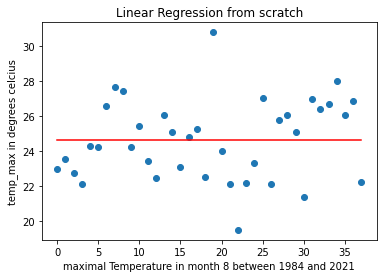

In 2050 it will have (on average): 24.645356536502543 degrees celcius


In [18]:
"""linear regression from scratch"""

def linear_regression(x, y): 
    # get number of observations in dataset
    N = len(x)
    
    # calculate means
    x_mean = x.mean()
    y_mean = y.mean()
    
    # calculate theta1: calculate numerator / denominator
    T1_num = ((x - x_mean) * (y - y_mean)).sum()
    T1_den = ((x - x_mean)**2).sum()
    T1 = T1_num / T1_den
    
    # calcualte theta0
    T0 = y_mean - (T1*x_mean)
    # regression line rounded to 20 decimal places    
    reg_line = 'y = {} + {}x'.format(T0, round(T1, 20))
    
    return (T0, T1, reg_line)

T0, T1, reg_line = linear_regression(x,y)

# print function
print('Regression Line: ', reg_line)

# calculating how well the line fits: 
# correlation coefficient R and coefficient of determination R^2
R2 = np.sum((x-x.mean())*(y-y.mean()))/(np.sqrt(np.sum((x-x.mean())**2))*(np.sqrt(np.sum((y-y.mean())**2))))
print('"Goodness of Fit": ', R2**2)

# SIMPLE PLOT
plt.figure()
plt.scatter(x,y)
plt.plot(x, T0 + T1*x,color = 'red')
plt.title('Linear Regression from scratch')
plt.xlabel(f'maximal Temperature in month {month} between 1984 and 2021')
plt.ylabel(f'{type} in degrees celcius')
plt.show()

# make predictions
def predict(new_x, T0=T0, T1=T1):
    y = T0 + T1 * new_x
    return y

print(f"In {year+1984} it will have (on average): {predict(year)} degrees celcius")
print(f"That is a temperature rise of {(predict(year)-y[0])} degrees celcius")


y = 24.0109873318532 + 0.03429022727834274x
score: 0.027949600361738658


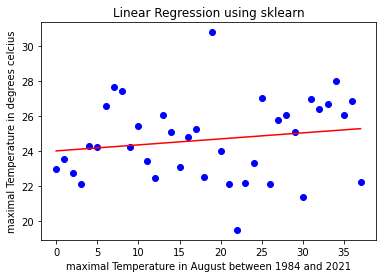

In 2050 it will have (on average): 26.27414233222382 degrees celcius


In [20]:
"""linear regression using sklearn"""

from sklearn.linear_model import LinearRegression

lin = LinearRegression()
fit = lin.fit(x, y)
score = lin.score(x,y)
reg_line = 'y = {} + {}x'.format(fit.intercept_, fit.coef_[0])

print(reg_line)
print("score:", score)

# Visualising the Linear Regression results
plt.scatter(x, y, color = 'blue')
plt.plot(x, lin.predict(x), color = 'red')
plt.title('Linear Regression using sklearn')
plt.xlabel('maximal Temperature in August between 1984 and 2021')
plt.ylabel('maximal Temperature in degrees celcius')
plt.show()

# make predictions
def predict(new_x, T0=fit.intercept_, T1=fit.coef_[0]):
    y = T0 + T1 * new_x
    return y

print(f"In {year+1984} it will have (on average): {predict(year)} degrees celcius")
print(f"That is a temperature rise of {(predict(year)-y[0])} degrees celcius")
